**Лабораторная работа №6
Преобразование Хафа**

**Цель работы:** 
Освоение преобразования для поиска геометрических примитивов.

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

1. Поиск прямых. Выбрать три произвольных изображения, содержащие прямые. Осуществить поиск прямых с помощью преобразования Хафа как для исходного изображения, так и для изображения, полученного с помощью использования какого-либо дифференциального оператора. Отразить найденные линии на исходном изображении. Отметить точки начала и окончания линий. Определить длины самой короткой и самой длинной прямых, вычислить количество найденных прямых.

In [66]:
def getHoughLinesImage(I):
    # Loads an image
    src = I

    dst = cv2.Canny(src, 50, 200, None, 3)

    # Copy edges to the images that will display the results in BGR
    cdst = cv2.cvtColor(dst, cv2.COLOR_GRAY2BGR)

    lines = cv2.HoughLines(dst, 1, np.pi / 180, 150, None, 0, 0)

    if lines is not None:
        for i in range(0, len(lines)):
            rho = lines[i][0][0]
            theta = lines[i][0][1]
            a = math.cos(theta)
            b = math.sin(theta)
            x0 = a * rho
            y0 = b * rho
            pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
            pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
            cv2.line(cdst, pt1, pt2, (0,0,255), 3, cv2.LINE_AA)
    
    return cdst, len(lines)


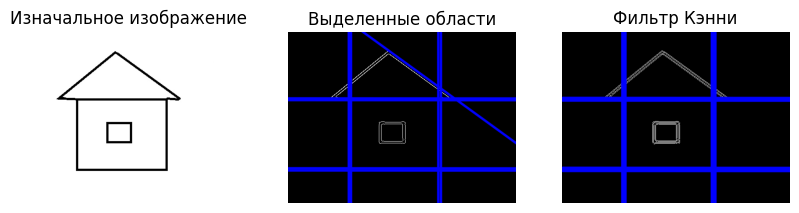

Количество линий без преобразования:  9
Количество линий c преобразованием:  16


In [67]:
house = cv2.imread("house.jpg", cv2.IMREAD_GRAYSCALE)
house_Canny = cv2.Canny(house, 50, 50)

hough_house = getHoughLinesImage(house)
hough_house_Canny = getHoughLinesImage(house_Canny)

plt.figure(figsize=(10,4))
plt.subplot(1, 3, 1)
plt.title('Изначальное изображение')
plt.axis('off')
plt.imshow(house, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('Выделенные области')
plt.imshow(hough_house[0])
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Фильтр Кэнни')
plt.imshow(hough_house_Canny[0])
plt.axis('off')
plt.show()

print("Количество линий без преобразования: ", hough_house[1])
print("Количество линий c преобразованием: ", hough_house_Canny[1])

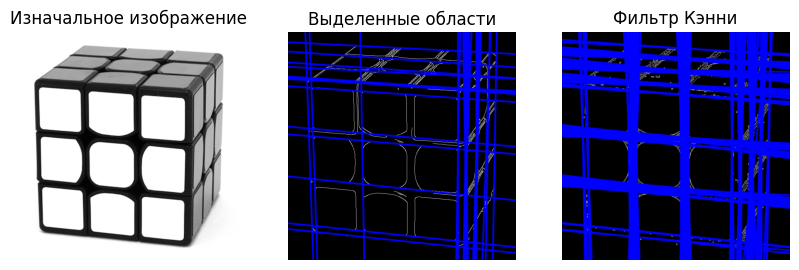

Количество линий без преобразования:  34
Количество линий c преобразованием:  187


In [5]:
cube = cv2.imread("cube.jpg", cv2.IMREAD_GRAYSCALE)
# фильтр Кэнни
cube_Canny = cv2.Canny(cube, 30, 40)

hough_cube = getHoughLinesImage(cube)
hough_cube_Canny = getHoughLinesImage(cube_Canny)

plt.figure(figsize=(10,4))
plt.subplot(1, 3, 1)
plt.title('Изначальное изображение')
plt.axis('off')
plt.imshow(cube, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('Выделенные области')
plt.imshow(hough_cube[0])
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Фильтр Кэнни')
plt.imshow(hough_cube_Canny[0])
plt.axis('off')
plt.show()

print("Количество линий без преобразования: ", hough_cube[1])
print("Количество линий c преобразованием: ", hough_cube_Canny[1])

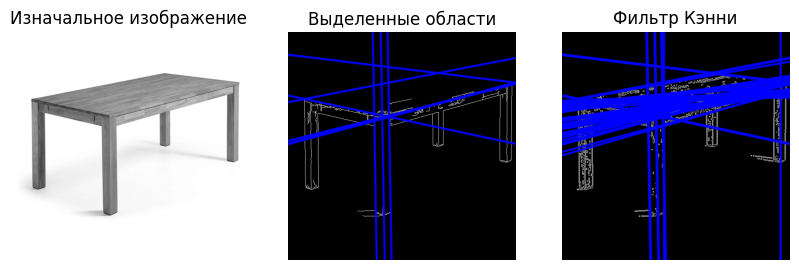

Количество линий без преобразования:  9
Количество линий c преобразованием:  57


In [6]:
cube = cv2.imread("table.jpg", cv2.IMREAD_GRAYSCALE)
# фильтр Кэнни
cube_Canny = cv2.Canny(cube, 70, 70)

hough_cube = getHoughLinesImage(cube)
hough_cube_Canny = getHoughLinesImage(cube_Canny)

plt.figure(figsize=(10,4))
plt.subplot(1, 3, 1)
plt.title('Изначальное изображение')
plt.axis('off')
plt.imshow(cube, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('Выделенные области')
plt.imshow(hough_cube[0])
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Фильтр Кэнни')
plt.imshow(hough_cube_Canny[0])
plt.axis('off')
plt.show()

print("Количество линий без преобразования: ", hough_cube[1])
print("Количество линий c преобразованием: ", hough_cube_Canny[1])

2. Поиск окружностей. Выбрать три произвольных изображения, содержащие окружности. Осуществить поиск окружностей как определенного радиуса, так и из заданного диапазона с помощью преобразования Хафа как для исходного изображения, так и для изображения, полученного с помощью использования какого-либо дифференциального оператора. 
Отразить найденные окружности на исходном изображении.

In [33]:
def getHoughCirclesImage(I, minDistt, minR, maxR):
    
    cimg = cv2.cvtColor(I, cv2.COLOR_GRAY2BGR)

    # lines = cv2.HoughLines(dst, 1, np.pi / 180, 150, None, 0, 0)
    circles = cv2.HoughCircles(I,cv2.HOUGH_GRADIENT,1,minDistt,
                            param1=1,param2=1,minRadius=minR,maxRadius=maxR)
    
    circles = np.uint16(np.around(circles))
    for i in circles[0,:]:
        # draw the outer circle
        cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
        # draw the center of the circle
        cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)
        
    return cimg, len(circles)


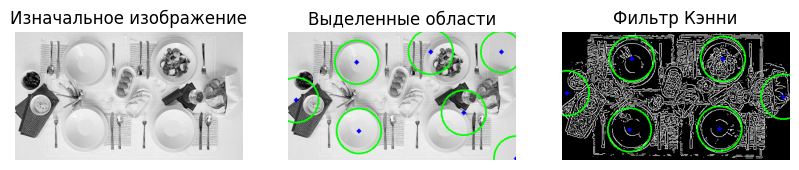

In [35]:
plates = cv2.imread("plates.jpg", cv2.IMREAD_GRAYSCALE)
# фильтр Кэнни
plates_Canny = cv2.Canny(plates, 30, 30)

hough_plates = getHoughCirclesImage(plates, 120, 35, 40)
hough_plates_Canny = getHoughCirclesImage(plates_Canny, 120, 35, 40)

plt.figure(figsize=(10,4))
plt.subplot(1, 3, 1)
plt.title('Изначальное изображение')
plt.axis('off')
plt.imshow(plates, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('Выделенные области')
plt.imshow(hough_plates[0])
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Фильтр Кэнни')
plt.imshow(hough_plates_Canny[0])
plt.axis('off')
plt.show()


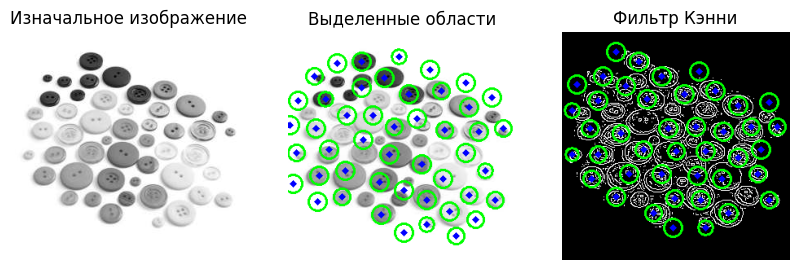

In [44]:
plates = cv2.imread("p.jpg", cv2.IMREAD_GRAYSCALE)
# фильтр Кэнни
plates_Canny = cv2.Canny(plates, 30, 30)

hough_plates = getHoughCirclesImage(plates, 30, 7, 12)
hough_plates_Canny = getHoughCirclesImage(plates_Canny, 30, 7, 12)

plt.figure(figsize=(10,4))
plt.subplot(1, 3, 1)
plt.title('Изначальное изображение')
plt.axis('off')
plt.imshow(plates, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('Выделенные области')
plt.imshow(hough_plates[0])
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Фильтр Кэнни')
plt.imshow(hough_plates_Canny[0])
plt.axis('off')
plt.show()


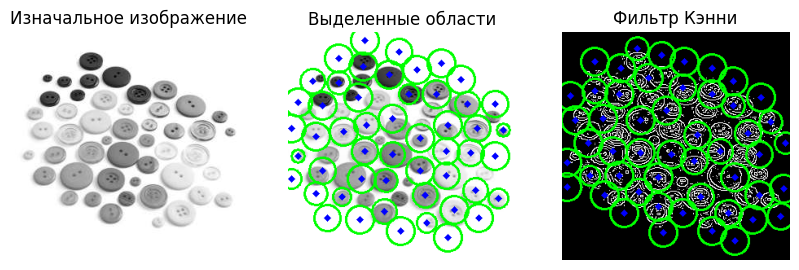

In [48]:
plates = cv2.imread("p.jpg", cv2.IMREAD_GRAYSCALE)
# фильтр Кэнни
plates_Canny = cv2.Canny(plates, 30, 30)

hough_plates = getHoughCirclesImage(plates, 30, 7, 18)
hough_plates_Canny = getHoughCirclesImage(plates_Canny, 30, 7, 18)

plt.figure(figsize=(10,4))
plt.subplot(1, 3, 1)
plt.title('Изначальное изображение')
plt.axis('off')
plt.imshow(plates, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('Выделенные области')
plt.imshow(hough_plates[0])
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Фильтр Кэнни')
plt.imshow(hough_plates_Canny[0])
plt.axis('off')
plt.show()


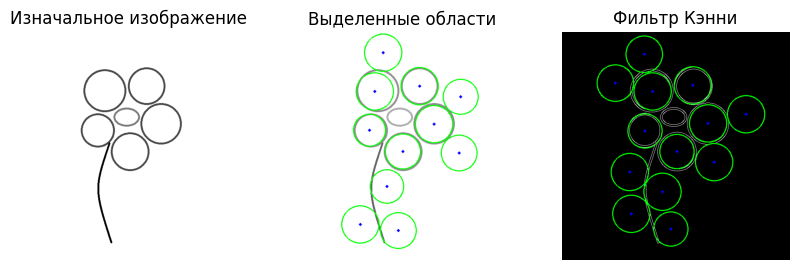

In [63]:
plates = cv2.imread("flower.png", cv2.IMREAD_GRAYSCALE)
# фильтр Кэнни
plates_Canny = cv2.Canny(plates, 30, 30)

hough_plates = getHoughCirclesImage(plates, 100, 20, 50)
hough_plates_Canny = getHoughCirclesImage(plates_Canny, 100, 20, 50)

plt.figure(figsize=(10,4))
plt.subplot(1, 3, 1)
plt.title('Изначальное изображение')
plt.axis('off')
plt.imshow(plates, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('Выделенные области')
plt.imshow(hough_plates[0])
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Фильтр Кэнни')
plt.imshow(hough_plates_Canny[0])
plt.axis('off')
plt.show()
